## Symbolic Computing

In [1]:
import sympy
sympy.init_printing()
import numpy as np

The emphasis in this course has been the use of computers for manipulting data or using numerical techniques to solve problems. These are central problems in scientific computing and are good windows into how computers work.

Of course, computers can be designed to do much more complex tasks and we should use computers when they are available to simplify/speed up/check our work. Symbolic computing is an excellent example of a computer resource that can assist in solving problems that we might usually associate with a human and a piece of paper. Fundamentally, the computer can do a lot of our math for us, so we should use it to check our results at the very least.

Sympy is a python library that can do a lot of math for us, in this way.  It is similar to mathematica in both function and design, but is freely available. One of the most basic sources of confusion is that these symbolic tools try to avoid making any assumptions:

In [2]:
x=sympy.Symbol('x')

In [3]:
sympy.sqrt(x**2)

Another way we can do this is using

In [4]:
from sympy.abc import z

In [5]:
sympy.sqrt(z**2)

Sympy does not know how to simplify this expression. What if $x$ or $z$ is a complex number? We will get different answers depending on our assumptions:

In [6]:
y=sympy.Symbol('y',real=True)

In [7]:
sympy.sqrt(y**2)

In [8]:
y=sympy.Symbol('y',positive=True)

In [9]:
sympy.sqrt(y**2)

In [10]:
n1=sympy.Symbol('n1',integer=True)
n2=sympy.Symbol('n2',odd=True)

In [11]:
sympy.cos(sympy.pi*n1)

In [12]:
sympy.cos(sympy.pi*n2)

## Manipulating Expressions

We can define experessions you might want to work with

In [13]:
exp=x**2+x*(x*2+x*2)+x*(x+1)+3

In [14]:
exp

We can simplify these expressions two ways:

In [15]:
sympy.simplify(exp)

In [16]:
exp.simplify()

If we want to copy and paste this expression in a more python friendly format, we can use print

In [17]:
print(exp.simplify())

6*x**2 + x + 3


Using a similar syntax, we can factor expressions

In [18]:
exp2=x**2+2*x+1

In [19]:
exp2

In [20]:
sympy.factor(exp2)

In [21]:
exp2.factor()

or expand

In [22]:
((x+2)**5).expand()

In [23]:
sympy.sin(x+y).expand(trig=True)

### Evaluating Expressions 

In a lot of situations, we need to combine our symbolic work with something numerical.  Sometimes, this means we just want to force the computer to return a demical instead of a symbolic expression for the number:

In [24]:
sympy.N(sympy.pi)

In [25]:
sympy.N(sympy.pi,50) # tell it you want 50 decimal places

In [26]:
sympy.cos(1)

In [27]:
sympy.N(sympy.cos(1))

In other situations, we have found a function that we want to be able to evaluate numerically:

In [28]:
exp

We can just substitute $x$ with a number (or another variable) if we like

In [29]:
exp.subs(x,10)

But we can also define an actual function we can use as normal with lambdify

In [30]:
exp_fnc=sympy.lambdify(x,exp)

In [31]:
exp_fnc(10)

In [32]:
x_array=np.linspace(1,10,10)

In [33]:
exp_fnc(x_array)

array([ 10.,  29.,  60., 103., 158., 225., 304., 395., 498., 613.])

In [34]:
exp3=sympy.sin(x**2)

In [35]:
exp_fnc3=sympy.lambdify(x,exp3)

In [36]:
exp_fnc3(x_array)

array([ 0.84147098, -0.7568025 ,  0.41211849, -0.28790332, -0.13235175,
       -0.99177885, -0.95375265,  0.92002604, -0.62988799, -0.50636564])

### Solving Equations

Not suprisingly, sympy is pretty good at solving equations.

In [37]:
sympy.solve(x**2-1)

In [38]:
sympy.solve(sympy.sin(x))

In [39]:
sympy.solve([x+y+1,x+2*y],[x,y])

In practice, a lot of the time, you want to solve equations for one variable in terms of other variables

In [40]:
from sympy.abc import a,b,c

In [41]:
exp4=a*x**2+b*x+c

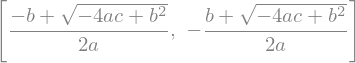

In [42]:
sympy.solve(exp4,x)

## Calculus

Calculus is one of the symbolic tools that tends to be very powerful and reliable. In some cases it would be enormously difficult to do it yourself yet the computer seems to find a nice answer quickly.

#### Derivatives

In [43]:
exp5=sympy.sin(x*sympy.cos(x**2 +x+2))
exp5

In [44]:
sympy.diff(exp5)

In [45]:
exp5.diff(x)

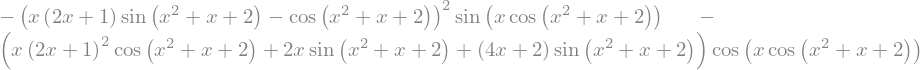

In [46]:
exp5.diff(x,x).simplify()

In [47]:
exp6=x**2*y+y**3*x+x+3*y

In [48]:
exp6.diff(y)

In [49]:
exp6.diff(x)

In [50]:
exp6.diff(x,y)

#### Series

An extremely useful tool when trying to understand functions is the Taylor series around a given point

In [51]:
exp5.series(x,0,3) # this means: series wrt x, at x=0 to order x^3.

This becomes much more useful when you start dealing with functions you don't konw a lot about

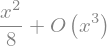

In [52]:
sympy.besselj(2,x).series(x,0,3)

Importantly, series is not really a Taylor series.  In includes inverse powers as well:

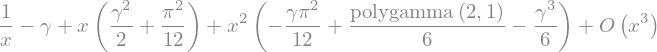

In [53]:
sympy.gamma(x).series(x,0,3)

To see why this is useful consider

In [54]:
(sympy.gamma(x)*sympy.sin(x)).subs(x,0)

In [55]:
(sympy.gamma(x)*sympy.sin(x)).series(x,0,2)

The function $\Gamma[x]\sin(x)$ is perfectly well behaved at $x=0$ but you need to look at the series as $x\to 0$ to see that.  There is also a limit option but in my experience series is always better than limit.

#### Integration

Integration is where it is really obvious how much better a computer is than a person.  Even just a minor change to an integral can make it faily challenging

In [56]:
sympy.integrate(sympy.sin(x),x)

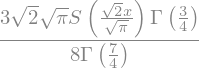

In [57]:
sympy.integrate(sympy.sin(x**2),x)

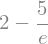

In [58]:
sympy.integrate(x**2*sympy.exp(-x),(x,0,1))

The notation for $\infty$ is a bit unusual

In [59]:
sympy.integrate(sympy.exp(-x**2),(x,0,sympy.oo))

We can also perform a integration that produces a function of some other variable:

In [60]:
a=sympy.Symbol('a')

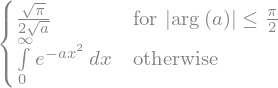

In [61]:
sympy.integrate(sympy.exp(-a*x**2),(x,0,sympy.oo))

Notice again that it didn't know what to do with our variable $a$ (it could be real, imaginary, complex, negative, postive. Fortunately, we can tell it what to assume to avoid this problem (sometimes it can't figure it out on its own):

In [62]:
c=sympy.Symbol('c',positive=True)

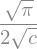

In [63]:
sympy.integrate(sympy.exp(-c*x**2),(x,0,sympy.oo))

### Solving differential equations

Analytic solutions to ODE is one of the more pratically useful aspects of symbolic math. As we have seen, numerical solutions can be poorly behaved and often we learn a lot from having an analytic expression. It works in a similar way to solve, but now we use dsolve.

We have to be careful to define the derivatives we want. E.g. suppse we want to solve the equation

$$\ddot q(t)+ \gamma \dot q(t) + \omega_0^2 q(t)= 0$$

with the initial conditions $q(t=0) = 1$ and $\dot q(t=0) = 0$. The we would define the LHS of the equation. To do this, we need to tell the computer that we want $q$ to be a function $q(t)$. We also need to define $t$ as a variable:

In [64]:
from sympy.abc import t,g,w
q=sympy.Function('q')

In [65]:
dexp=q(t).diff(t,t)+g*q(t).diff(t)+w**2*q(t)

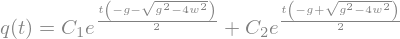

In [66]:
sympy.dsolve(dexp,q(t))

If we now want to give specific initial conditions, we can impose those as

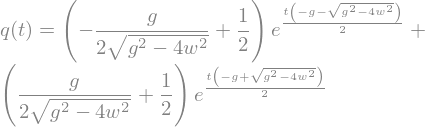

In [67]:
sympy.dsolve(dexp,q(t),ics={q(0):1,q(t).diff(t).subs(t,0):0})

Here ics stands for initial conditions and are specified like a system of equations. The less obvious part is how to force the derivative to be evaluated at $t=0$:

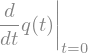

In [68]:
q(t).diff(t).subs(t,0)

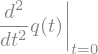

In [69]:
q(t).diff(t,t).subs(t,0)

Dsolve have lots and lots of additional functionality, allowing you to suggest strategies for solving equations or checking solutions. Of course, we can leave that to future courses...

### Linear Algebra

We can also work with matrices (and tensors, etc) in sympy. To define a matrix we write

In [72]:
A = sympy.Matrix(3,3,[a,2,b,2,1,a,2*a,b,3])

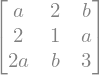

In [73]:
A

Basic matrix operations then are straight forward

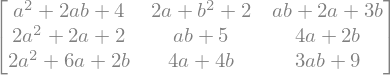

In [75]:
A*A

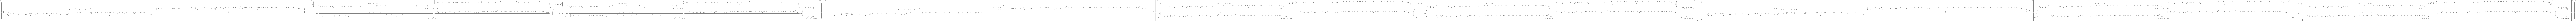

In [86]:
A.eigenvects()

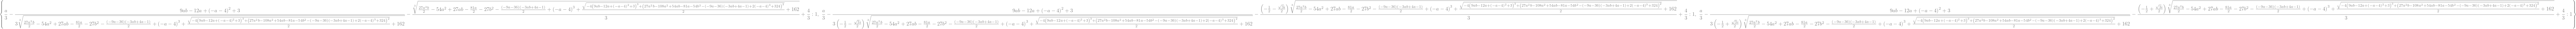

In [85]:
A.eigenvals()

Vectors are introduced just as specific shaped matrices.

In [78]:
K= sympy.Matrix(3,1,[1,2,3])
K

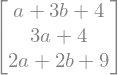

In [80]:
A*K

To act from the left, we need to take the transpose, which we can do as follows:

In [82]:
K.T*A

## Summary

Symbolic computation is extremely powerful and useful. The functionality is really quite endless.  However, one often does not appreciate all that it can do until you really need it.  At the very least, it will keep you from making stupid mistakes on your homework.